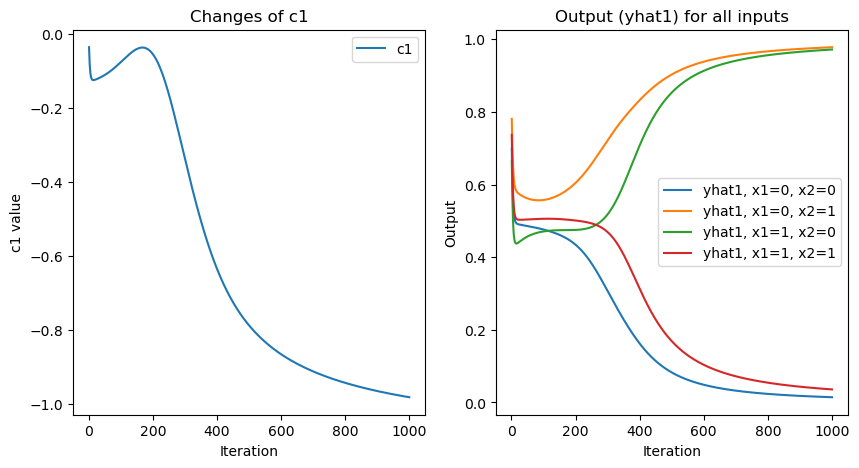

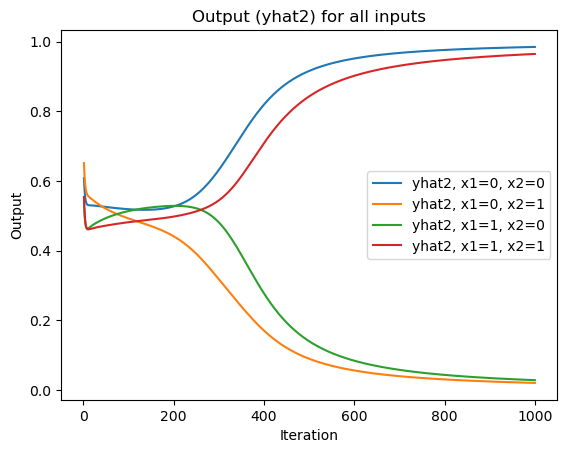

<Figure size 640x480 with 0 Axes>

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and biases
W1 = np.random.randn(2, 5)
B1 = np.random.randn(1, 5)
W2 = np.random.randn(5, 2)
B2 = np.random.randn(1, 2)
c1 = np.zeros((1, 5))  # Initialize c1 with zeros

# Define inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_true = np.array([[0, 1], [1, 0], [1, 0], [0, 1]])

# Define learning rate
learning_rate = 0.1

# List to store changes of c1
c1_changes = []
yhat_history = []

# Repeat 1000 times
for _ in range(1000):
    # Forward pass
    Z1 = np.dot(X, W1) + B1 + c1  # Include c1
    Y1 = sigmoid(Z1)
    Z2 = np.dot(Y1, W2) + B2
    Y2 = sigmoid(Z2)
    
    yhat_history.append(Y2.copy())  # Store yhat1 and yhat2
    
    # Backpropagation
    dZ2 = Y2 - Y_true
    dW2 = np.dot(Y1.T, dZ2)
    dB2 = np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * Y1 * (1 - Y1)
    dW1 = np.dot(X.T, dZ1)
    dB1 = np.sum(dZ1, axis=0, keepdims=True)
    dc1 = np.sum(dZ1, axis=0, keepdims=True)
    
    # Update weights, biases, and c1
    W1 -= learning_rate * dW1
    B1 -= learning_rate * dB1
    W2 -= learning_rate * dW2
    B2 -= learning_rate * dB2
    c1 -= learning_rate * dc1
    
    # Store changes of c1
    c1_changes.append(c1.copy())

# Plot changes of c1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 1001), [c[0][0] for c in c1_changes], label='c1')
plt.xlabel('Iteration')
plt.ylabel('c1 value')
plt.title('Changes of c1')
plt.legend()

# Plot yhat1 and yhat2 for all inputs in all iterations
yhat_history = np.array(yhat_history)
plt.subplot(1, 2, 2)

# Plot yhat1 for each input-output pair
for i in range(4):
    plt.plot(range(1, 1001), yhat_history[:, i, 0], label=f'yhat1, x1={X[i][0]}, x2={X[i][1]}')

plt.xlabel('Iteration')
plt.ylabel('Output')
plt.title('Output (yhat1) for all inputs')
plt.legend()
plt.figure()

# Plot yhat2 for each input-output pair
for i in range(4):
    plt.plot(range(1, 1001), yhat_history[:, i, 1], label=f'yhat2, x1={X[i][0]}, x2={X[i][1]}')

plt.xlabel('Iteration')
plt.ylabel('Output')
plt.title('Output (yhat2) for all inputs')
plt.legend()
plt.show()

plt.tight_layout()
plt.show()
